# Logistic Regression
## 분류 문제

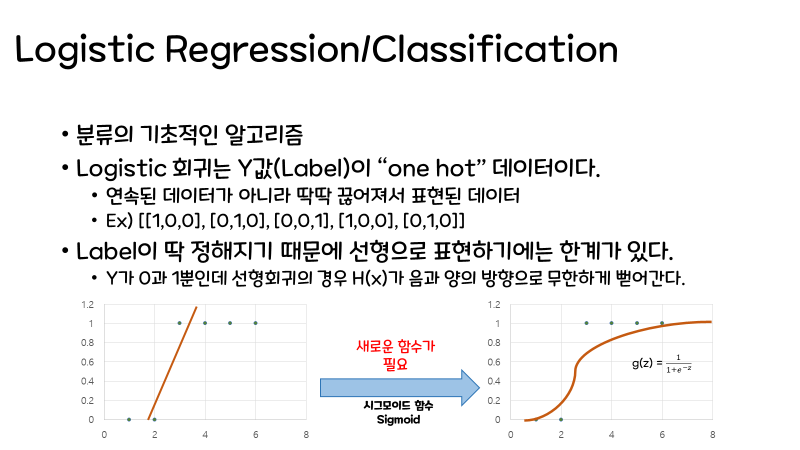

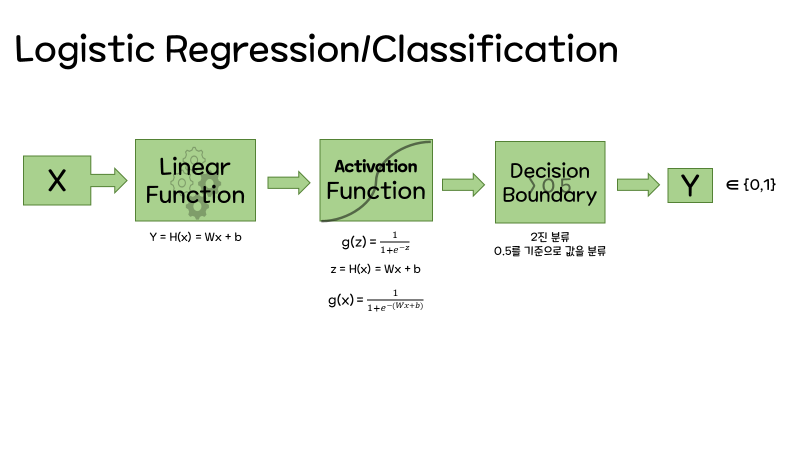

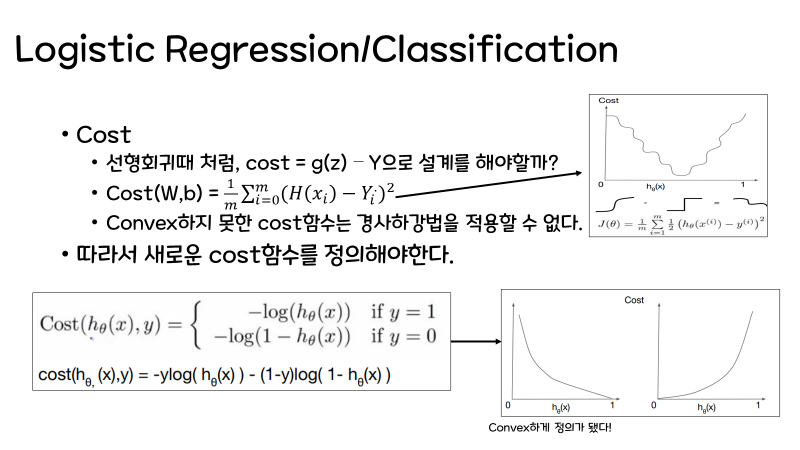

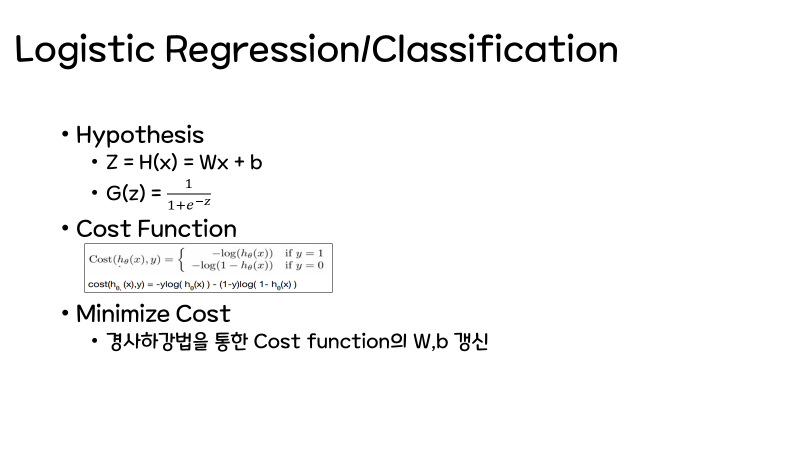

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

print(torch.__version__)

1.10.1


In [2]:
# 예제
x_data = [[0],[2],[1],[9],[10]]
y_data = [[0],[0],[0],[1],[1]]

X = torch.tensor(np.array(x_data)).float()
Y = torch.tensor(np.array(y_data)).float()

print(X)
print(Y)

tensor([[ 0.],
        [ 2.],
        [ 1.],
        [ 9.],
        [10.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [3]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.fc1 = nn.Linear(1, 1)

        self.act_fn = nn.Sigmoid()

    def forward(self, input):
        x = self.fc1(input)
        x = self.act_fn(x)
        return x

model = MyModel()
opt = optim.Adam(model.parameters())
loss_fn = nn.BCELoss()

print(model)

MyModel(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (act_fn): Sigmoid()
)


In [4]:
# 학습
model.train()
for epoch in range(1, 1001):
    x, y = X, Y

    opt.zero_grad()

    output = model(x)
    loss = loss_fn(output, y)

    loss.backward()
    opt.step()

    if epoch % 25 == 0:
        print("EPOCH {}  >>>  Loss : {:.5f}".format(epoch, loss))

EPOCH 25  >>>  Loss : 0.96217
EPOCH 50  >>>  Loss : 0.93793
EPOCH 75  >>>  Loss : 0.91404
EPOCH 100  >>>  Loss : 0.89053
EPOCH 125  >>>  Loss : 0.86741
EPOCH 150  >>>  Loss : 0.84471
EPOCH 175  >>>  Loss : 0.82245
EPOCH 200  >>>  Loss : 0.80066
EPOCH 225  >>>  Loss : 0.77935
EPOCH 250  >>>  Loss : 0.75858
EPOCH 275  >>>  Loss : 0.73837
EPOCH 300  >>>  Loss : 0.71877
EPOCH 325  >>>  Loss : 0.69983
EPOCH 350  >>>  Loss : 0.68159
EPOCH 375  >>>  Loss : 0.66413
EPOCH 400  >>>  Loss : 0.64750
EPOCH 425  >>>  Loss : 0.63176
EPOCH 450  >>>  Loss : 0.61699
EPOCH 475  >>>  Loss : 0.60323
EPOCH 500  >>>  Loss : 0.59052
EPOCH 525  >>>  Loss : 0.57887
EPOCH 550  >>>  Loss : 0.56828
EPOCH 575  >>>  Loss : 0.55868
EPOCH 600  >>>  Loss : 0.55000
EPOCH 625  >>>  Loss : 0.54213
EPOCH 650  >>>  Loss : 0.53493
EPOCH 675  >>>  Loss : 0.52826
EPOCH 700  >>>  Loss : 0.52201
EPOCH 725  >>>  Loss : 0.51606
EPOCH 750  >>>  Loss : 0.51033
EPOCH 775  >>>  Loss : 0.50475
EPOCH 800  >>>  Loss : 0.49927
EPOCH 825  

In [5]:
# 성능 검증
# X, Y를 그대로 넣어서 제대로 분류하는 확인
def decision_boundary(output):
    return (output >= torch.tensor([0.5])).float()

model.eval()

output = model(X)
output = decision_boundary(output)
print("모델이 예측한 값 :",output.view(-1))
print("실제 값 : ", Y.view(-1))
print("정확도 : {}%".format(((output == Y).view(-1).sum() / 5. * 100.).item()))

모델이 예측한 값 : tensor([0., 1., 0., 1., 1.])
실제 값 :  tensor([0., 0., 0., 1., 1.])
정확도 : 80.0%


### 새로운 데이터가 추가 되었다.

In [6]:
# 예제
x_data = [[0],[2],[1],[9],[10],[20],[5]]
y_data = [[0],[0],[0],[1],[1], [1], [0]]

X = torch.tensor(np.array(x_data)).float()
Y = torch.tensor(np.array(y_data)).float()

print(X)
print(Y)

tensor([[ 0.],
        [ 2.],
        [ 1.],
        [ 9.],
        [10.],
        [20.],
        [ 5.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.]])


In [7]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.fc1 = nn.Linear(1, 1)

        self.act_fn = nn.Sigmoid()

    def forward(self, input):
        x = self.fc1(input)
        x = self.act_fn(x)
        return x

model = MyModel()
opt = optim.Adam(model.parameters())
loss_fn = nn.BCELoss()

print(model)

MyModel(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (act_fn): Sigmoid()
)


In [8]:
# 학습
model.train()
for epoch in range(1, 1001):
    x, y = X, Y

    opt.zero_grad()

    output = model(x)
    loss = loss_fn(output, y)

    loss.backward()
    opt.step()

    if epoch % 25 == 0:
        print("EPOCH {}  >>>  Loss : {:.5f}".format(epoch, loss))

EPOCH 25  >>>  Loss : 0.87950
EPOCH 50  >>>  Loss : 0.80764
EPOCH 75  >>>  Loss : 0.74866
EPOCH 100  >>>  Loss : 0.70152
EPOCH 125  >>>  Loss : 0.66421
EPOCH 150  >>>  Loss : 0.63451
EPOCH 175  >>>  Loss : 0.61047
EPOCH 200  >>>  Loss : 0.59060
EPOCH 225  >>>  Loss : 0.57378
EPOCH 250  >>>  Loss : 0.55923
EPOCH 275  >>>  Loss : 0.54639
EPOCH 300  >>>  Loss : 0.53487
EPOCH 325  >>>  Loss : 0.52439
EPOCH 350  >>>  Loss : 0.51474
EPOCH 375  >>>  Loss : 0.50575
EPOCH 400  >>>  Loss : 0.49733
EPOCH 425  >>>  Loss : 0.48937
EPOCH 450  >>>  Loss : 0.48181
EPOCH 475  >>>  Loss : 0.47461
EPOCH 500  >>>  Loss : 0.46770
EPOCH 525  >>>  Loss : 0.46107
EPOCH 550  >>>  Loss : 0.45468
EPOCH 575  >>>  Loss : 0.44851
EPOCH 600  >>>  Loss : 0.44254
EPOCH 625  >>>  Loss : 0.43676
EPOCH 650  >>>  Loss : 0.43114
EPOCH 675  >>>  Loss : 0.42569
EPOCH 700  >>>  Loss : 0.42038
EPOCH 725  >>>  Loss : 0.41521
EPOCH 750  >>>  Loss : 0.41017
EPOCH 775  >>>  Loss : 0.40525
EPOCH 800  >>>  Loss : 0.40046
EPOCH 825  

In [9]:
# 성능 검증
# X, Y를 그대로 넣어서 제대로 분류하는 확인
def decision_boundary(output):
    return (output >= torch.tensor([0.5])).float()

model.eval()

output = model(X)
output = decision_boundary(output)
print("모델이 예측한 값 :",output.view(-1))
print("실제 값 : ", Y.view(-1))
print("정확도 : {:.2f}%".format(((output == Y).view(-1).sum() / 7. * 100.).item()))

모델이 예측한 값 : tensor([0., 0., 0., 1., 1., 1., 1.])
실제 값 :  tensor([0., 0., 0., 1., 1., 1., 0.])
정확도 : 85.71%


## 다변수 회귀 분류
+ Using Softmax

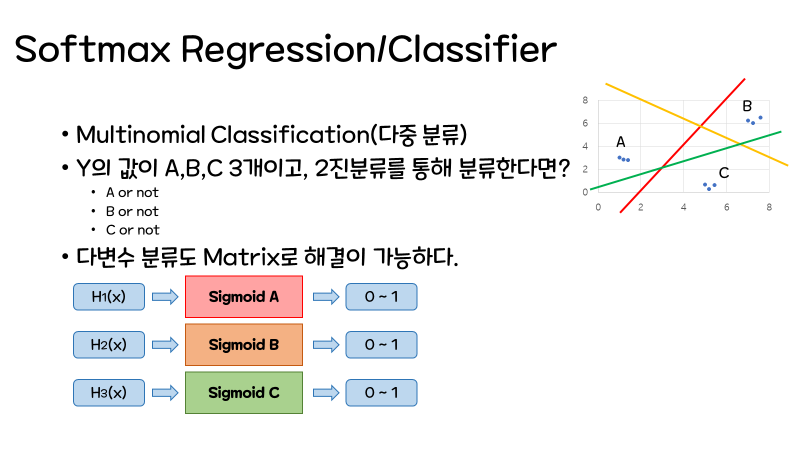

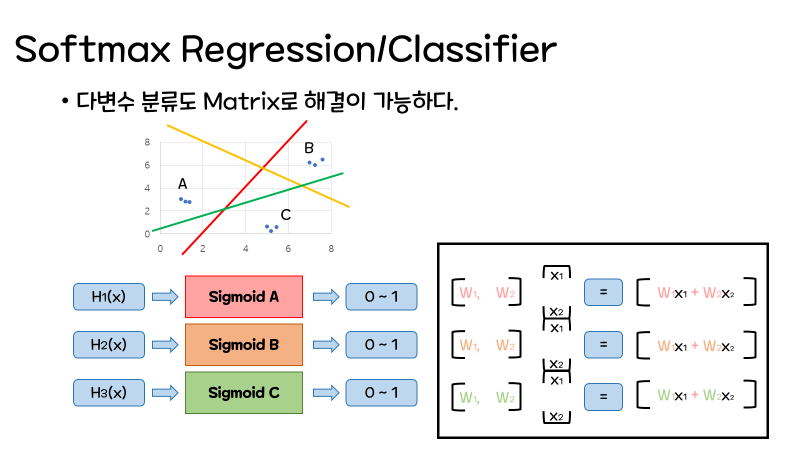

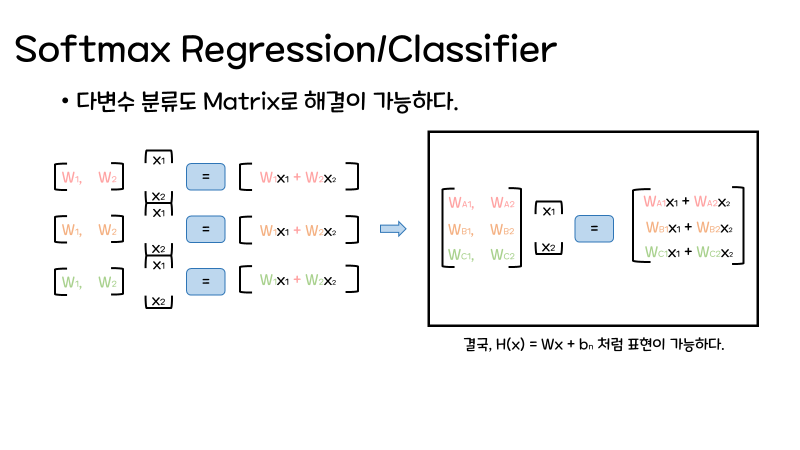

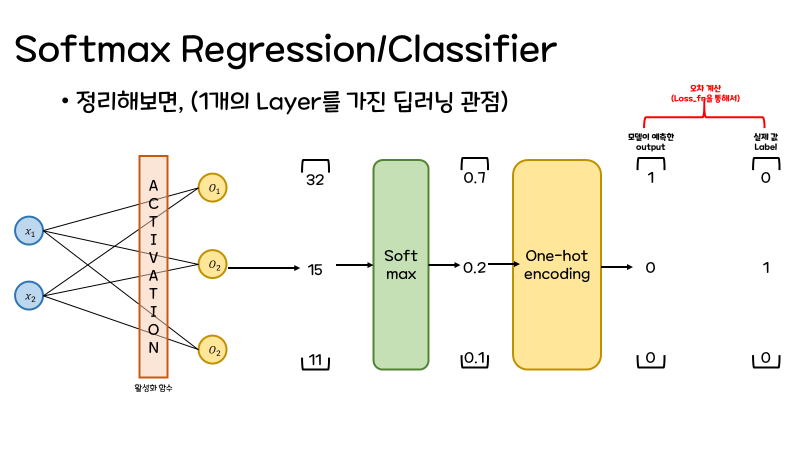

In [10]:
# 예제
x_data = [[1.2, 3.4],[1.1, 3.2],[1.5, 3.7],
          [5.2, 0.7],[4.7, 0.6],[5.6, 0.9],
          [7.7, 6.6],[7.5, 7.2],[8.1, 6.2]]
y_data = [0,0,0,
          1,1,1, 
          2,2,2]

X = torch.tensor(x_data)
Y = torch.tensor(y_data)

print(X)
print(Y)

tensor([[1.2000, 3.4000],
        [1.1000, 3.2000],
        [1.5000, 3.7000],
        [5.2000, 0.7000],
        [4.7000, 0.6000],
        [5.6000, 0.9000],
        [7.7000, 6.6000],
        [7.5000, 7.2000],
        [8.1000, 6.2000]])
tensor([0, 0, 0, 1, 1, 1, 2, 2, 2])


In [11]:
# Label을 3개의 클래스를 가지도록 one-hot encoding 해줌
Y = F.one_hot(Y, num_classes=3).float()
Y

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [42]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.fc1 = nn.Linear(2, 3)

        self.act_fn = nn.Softmax(dim=1)

    def forward(self, input):
        x = self.fc1(input)
        x = self.act_fn(x)
        return x

model = MyModel()
opt = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

print(model)

MyModel(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (act_fn): Softmax(dim=1)
)


In [43]:
# 학습
model.train()
for epoch in range(1, 1501):
    x, y = X, Y

    opt.zero_grad()

    output = model(x)
    loss = loss_fn(output, y)

    loss.backward()
    opt.step()

    if epoch % 25 == 0:
        print("EPOCH {}  >>>  Loss : {:.5f}".format(epoch, loss))

EPOCH 25  >>>  Loss : 1.02031
EPOCH 50  >>>  Loss : 1.00895
EPOCH 75  >>>  Loss : 0.99802
EPOCH 100  >>>  Loss : 0.98769
EPOCH 125  >>>  Loss : 0.97803
EPOCH 150  >>>  Loss : 0.96896
EPOCH 175  >>>  Loss : 0.96031
EPOCH 200  >>>  Loss : 0.95159
EPOCH 225  >>>  Loss : 0.94148
EPOCH 250  >>>  Loss : 0.92642
EPOCH 275  >>>  Loss : 0.90064
EPOCH 300  >>>  Loss : 0.86479
EPOCH 325  >>>  Loss : 0.82898
EPOCH 350  >>>  Loss : 0.79900
EPOCH 375  >>>  Loss : 0.77486
EPOCH 400  >>>  Loss : 0.75522
EPOCH 425  >>>  Loss : 0.73892
EPOCH 450  >>>  Loss : 0.72510
EPOCH 475  >>>  Loss : 0.71318
EPOCH 500  >>>  Loss : 0.70275
EPOCH 525  >>>  Loss : 0.69351
EPOCH 550  >>>  Loss : 0.68525
EPOCH 575  >>>  Loss : 0.67780
EPOCH 600  >>>  Loss : 0.67103
EPOCH 625  >>>  Loss : 0.66486
EPOCH 650  >>>  Loss : 0.65920
EPOCH 675  >>>  Loss : 0.65399
EPOCH 700  >>>  Loss : 0.64917
EPOCH 725  >>>  Loss : 0.64471
EPOCH 750  >>>  Loss : 0.64056
EPOCH 775  >>>  Loss : 0.63669
EPOCH 800  >>>  Loss : 0.63309
EPOCH 825  

In [44]:
# 성능 검증
# X, Y를 그대로 넣어서 제대로 분류하는 확인
def calc_acc(output, y):
    p_m_val, p_m_idx = torch.max(output, dim=1)
    y_m_val, y_m_idx = torch.max(y, dim=1)
    return (p_m_idx == y_m_idx).sum()
    

model.eval()

output = model(X)
acc = calc_acc(output, Y)
print("모델이 예측한 값 :",output)
print("실제 값 : ", Y)
print("정확도 : {:.2f}%".format(acc / 9. * 100.))

모델이 예측한 값 : tensor([[9.4259e-01, 2.4447e-03, 5.4970e-02],
        [9.4027e-01, 3.1480e-03, 5.6586e-02],
        [9.3180e-01, 2.2921e-03, 6.5911e-02],
        [9.0985e-05, 9.5731e-01, 4.2603e-02],
        [2.1392e-04, 9.5028e-01, 4.9503e-02],
        [6.0590e-05, 9.5549e-01, 4.4447e-02],
        [1.0728e-02, 2.2483e-02, 9.6679e-01],
        [2.6211e-02, 8.5016e-03, 9.6529e-01],
        [3.7751e-03, 4.9346e-02, 9.4688e-01]], grad_fn=<SoftmaxBackward0>)
실제 값 :  tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])
정확도 : 100.00%
